**Nama : Andhik Surya Saputra**

**Kelas : Data Science Kelas B**

**Tugas : Capstone Project Modul 2**

# Latar Belakang
**Bangkok**, sebagai salah satu destinasi pariwisata terkemuka di Asia, menyokong ekosistem akomodasi yang dinamis melalui platform *sharing economy* seperti Airbnb. Pariwisata di Bangkok sendiri menyumbang sekitar **20% PDB Thailand** sebelum pandemi, analisis dataset ini dapat mengungkap pola yang mendukung pengambilan keputusan strategis bagi host dan pelaku industri pariwisata. Lebih jauh, data ini memungkinkan eksplorasi dampak sosial-ekonomi Airbnb, seperti potensi gentrifikasi atau pemberdayaan ekonomi mikro melalui penyewaan properti.



## Pernyataan Masalah
Para stakeholder termasuk host Airbnb dan pelaku bisnis pariwisata, ingin memahami faktor-faktor yang mendorong keberhasilan listing Airbnb di Bangkok, baik dari segi popularitas maupun pendapatan. Informasi ini akan memungkinkan host untuk mengoptimalkan strategi penetapan harga dan pemasaran, serta membantu pelaku bisnis pariwisata untuk lebih mengembangkang potensi wisata baru.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

**Apa karakteristik utama listing Airbnb yang sukses (dilihat dari tingkat ulasan, ketersediaan, dan pendapatan potensial) dibandingkan dengan listing yang kurang sukses, dengan mempertimbangkan faktor seperti harga, kedekatan dengan transportasi publik, tipe kamar, dan lingkungan geografis?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data Airbnb Listing Bangkok.csv . Dataset dapat diakses [di sini](https://drive.google.com/file/d/1Kagt-IMGruvyBV3tH6HYa721JK-TN-56/view?usp=drive_link). 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from geopy.distance import geodesic

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi dengan 15.853 baris dan 17 kolom, mencakup informasi kritis seperti harga, lokasi, tipe kamar, jumlah ulasan, dan ketersediaan. 17 kolom di dalam dataset Airbnb Listings Bangkok, yaitu:  

* `id` : ID unik untuk setiap listing.
* `name` : Nama listing (judul yang ditampilkan)
* `host_id` : ID pemilik atau host
* `host_name` : Nama tuan rumah. Biasanya, hanya nama depan.
* `neighborhood` : Lokasi/area tempat listing berada
* `latitude` : Menggunakan proyeksi Sistem Geodetik Dunia (WGS84) untuk lintang dan bujur.
* `longitude` : Menggunakan proyeksi Sistem Geodetik Dunia (WGS84) untuk lintang dan bujur.
* `room_type` : Jenis ruangan [Seluruh rumah/apartemen | Kamar pribadi | Kamar bersama] Semua rumah dikelompokkan ke dalam tiga tipe kamar berikut:

    **Seluruh Rumah/Apartemen:**
    Seluruh Rumah: Penyewa mendapatkan akses penuh terhadap seluruh rumah, termasuk semua kamar tidur, ruang tamu, dapur, kamar mandi, dan fasilitas lainnya. Penyewa tidak berbagi rumah dengan orang lain selama masa sewa. Lingkungan dan fasilitas terasa seperti rumah pribadi jadi Sangat ideal untuk keluarga, kelompok teman, atau rombongan yang membutuhkan privasi penuh dan ruang yang lebih luas.

    **Kamar pribadi:**
    Kamar pribadi: tipe akomodasi di mana penyewa menyewa satu kamar pribadi di dalam sebuah properti yang masih dihuni oleh pemilik atau penyewa lain. Kamar bersifat pribadi dan hanya dapat diakses oleh penyewa, namun area umum seperti dapur, ruang tamu, dan kadang-kadang kamar mandi akan digunakan bersama dengan penghuni lain. Cocok untuk pelancong individu atau pasangan yang menginginkan privasi di kamar, namun tetap nyaman untuk berbagi fasilitas umum.
                
    **Kamar bersama:**
    Kamar bersama: jenis akomodasi di mana penyewa berbagi satu kamar yang sama dengan tamu lain yang tidak saling mengenal. Biasanya terdiri dari beberapa tempat tidur dalam satu kamar (seperti ranjang susun), dan fasilitas umum juga digunakan bersama-sama. Pilihan ini cocok untuk backpacker atau pelancong dengan anggaran terbatas yang tidak keberatan berbagi ruang dengan orang lain.


* `price` : Harga harian dalam mata uang lokal (Bath Thailand). Catatan, tanda $ dapat digunakan meskipun menggunakan bahasa lokal.
* `minimum_nights` : Jumlah malam menginap minimum untuk listing (aturan kalender mungkin berbeda).
* `number_of_reviews` : Jumlah ulasan yang dimiliki iklan tersebut.
* `last_review` : Tanggal peninjauan terakhir/terbaru.
* `calculated_host_listings_count` : Jumlah listing yang dimiliki host dalam scrape saat ini di geografi kota/wilayah.
* `availability_365` : Berapa hari listing tersedia dalam setahun atau ketersediaan. Kalender menentukan ketersediaan listing x hari ke depan. Perhatikan bahwa listing mungkin tersedia karena telah dipesan oleh tamu atau diblokir oleh tuan rumah.
* `number_of_reviews_ltm` : Review yang masuk dalam 12 bulan terakhir 


Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listings Bangkok.

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi mengenai jumlah baris, kolom, tipe data, statistik deskriptif, dan nilai unik untuk memahami struktur dari dataset Airbnb Listing Bangkok.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

- Statistik deskriptif untuk kolom numerik

In [4]:
display(df.describe())

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


- Statistik deskriptif untuk kolom kategorikal

In [5]:
display(df.describe(include='object'))

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


- Mengecek nilai unik untuk setiap kolom

In [6]:
unique_values = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Unique': [df[col].nunique() for col in df.columns],
    'Unique Sample': [df[col].unique()[:5] for col in df.columns]
})
display(unique_values)

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865]"
2,name,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315]"
4,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem]"
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000]"


- Mengecek persentase nilai hilang (missing values) per kolom. Persentase nilai hilang dihitung untuk menentukan kolom mana yang memerlukan penanganan khusus.

In [7]:
missing_values = df.isnull().mean() * 100
print("\nPersentase nilai hilang per kolom:")
print(missing_values[missing_values > 0])


Persentase nilai hilang per kolom:
name                  0.050460
host_name             0.006308
last_review          36.520752
reviews_per_month    36.520752
dtype: float64


- Visualisasi distribusi kolom numerik untuk mendeteksi outlier. Visualisasi boxplot digunakan untuk mendeteksi outlier pada kolom numerik seperti price, minimum_nights, dan lainnya.

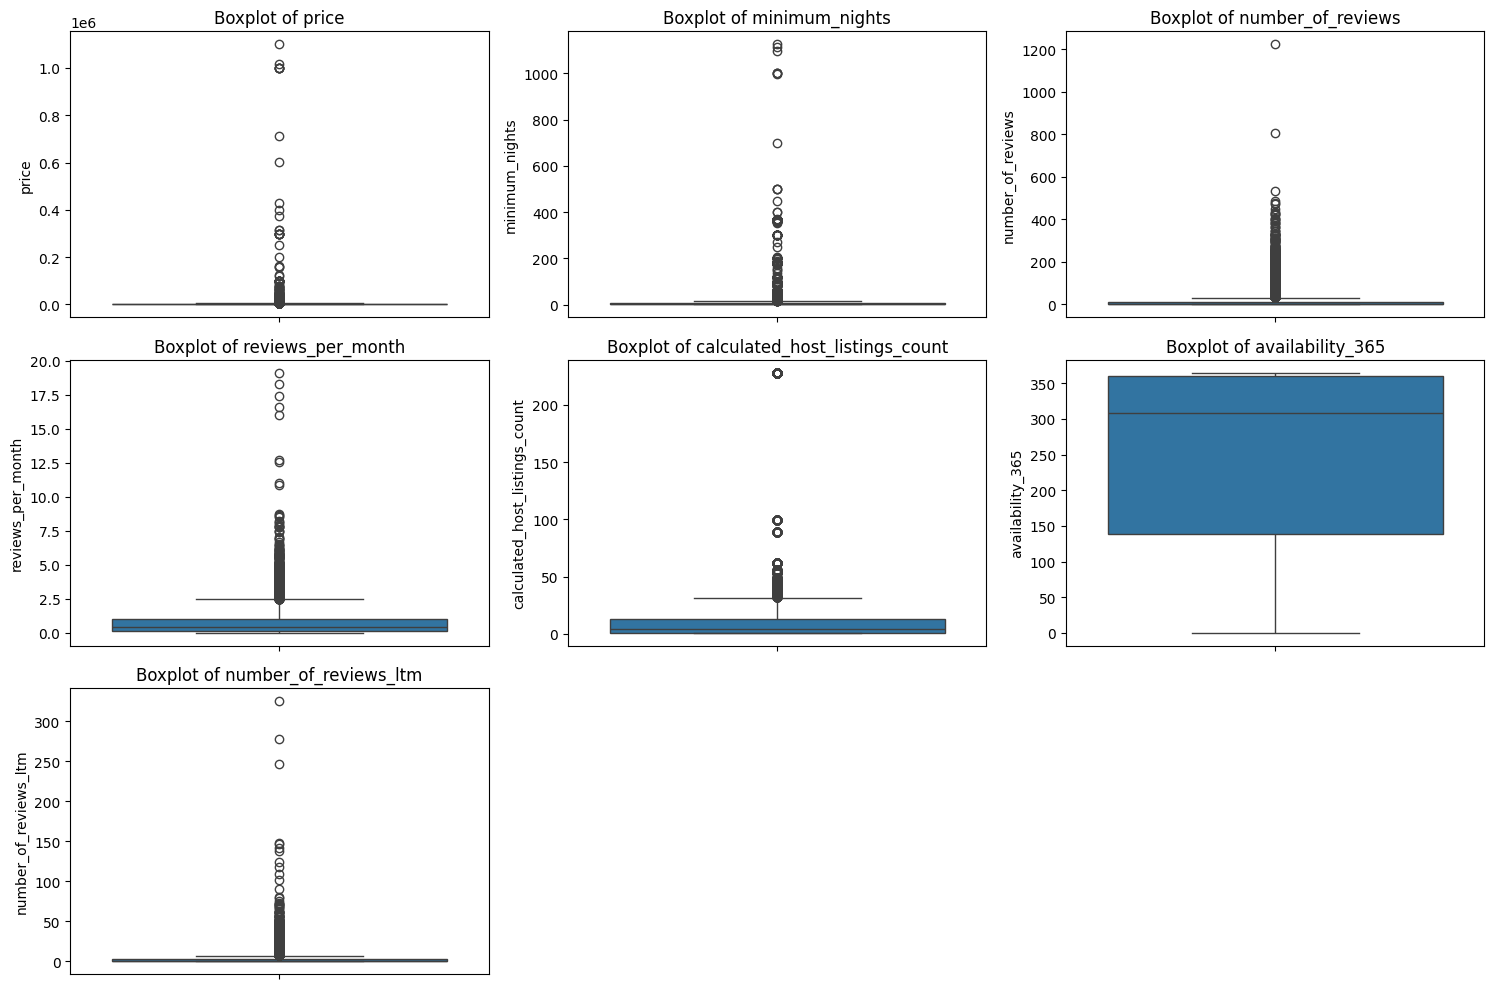

In [8]:
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Data Cleaning
1. Menangani missing value

- Kolom name dan `host_name` diisi dengan nilai default ('No Name Provided' dan 'Unknown Host') karena informasi ini bersifat deskriptif dan tidak kritis untuk analisis utama.
- Kolom `last_review` dan `reviews_per_month` diisi dengan 'No Reviews' dan 0 untuk listing tanpa ulasan, sesuai dengan logika bahwa listing tersebut belum memiliki ulasan.

In [9]:
df['name'].fillna('No Name Provided', inplace=True)

- Kolom 'host_name': Mengisi nilai hilang dengan 'Unknown Host'

In [10]:
df['host_name'].fillna('Unknown Host', inplace=True)

- Kolom `last_review` dan `reviews_per_month`: Mengisi dengan 0 untuk listing tanpa ulasan

In [11]:
df['last_review'].fillna('No Reviews', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

- Verifikasi bahwa tidak ada lagi nilai hilang

In [12]:
print("\nPersentase nilai hilang setelah penanganan:")
print(df.isnull().mean() * 100)


Persentase nilai hilang setelah penanganan:
Unnamed: 0                        0.0
id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64


2. Memeriksa dan menangani tipe data

- Kolom last_review dikonversi ke tipe datetime untuk analisis berbasis waktu di masa depan, dengan pengecualian untuk 'No Reviews'.
- Kolom numerik seperti `price`, `minimum_nights`, dll., dipastikan bertipe numerik untuk mencegah masalah dalam perhitungan.

In [13]:
df.loc[df['last_review'] != 'No Reviews', 'last_review'] = pd.to_datetime(
    df.loc[df['last_review'] != 'No Reviews', 'last_review'], errors='coerce'
)

- Memastikan kolom numerik memiliki tipe data yang benar

In [14]:
df['price'] = df['price'].astype(float)
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].astype(int)

3. Menangani outlier pada kolom 'price' menggunakan metode IQR
- Metode IQR (Interquartile Range) adalah teknik statistik yang digunakan untuk mendeteksi dan menangani outlier dalam sebuah dataset. Outlier adalah nilai-nilai yang secara signifikan berbeda dari sebagian besar data lainnya, dan dapat menyebabkan analisis menjadi bias atau tidak akurat.
- Outlier pada kolom price ditangani menggunakan metode IQR karena harga yang ekstrem dapat memengaruhi analisis pendapatan potensial. Nilai di luar batas diganti dengan batas atas/bawah untuk menjaga distribusi yang wajar.

In [15]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

- Mengganti outlier dengan batas atas/bawah

In [16]:
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

- Visualisasi distribusi harga setelah penanganan outlier

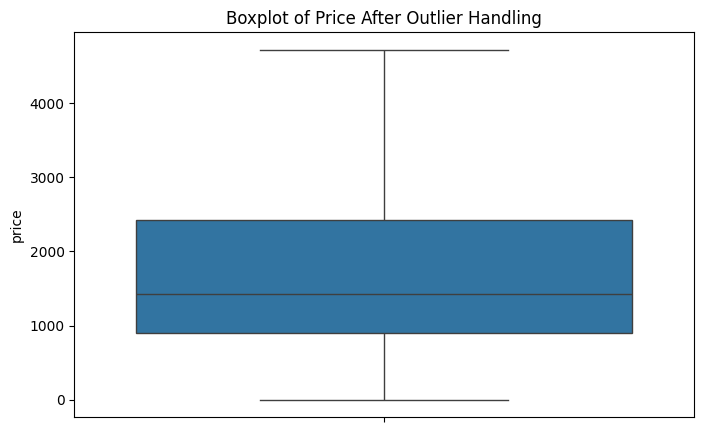

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['price'])
plt.title('Boxplot of Price After Outlier Handling')
plt.show()

4. Memeriksa duplikasi data
- Pemeriksaan duplikasi dilakukan untuk memastikan tidak ada baris yang identik secara tidak sengaja.

In [18]:
duplicates = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicates}')

Jumlah baris duplikat: 0


5. Memeriksa konsistensi data kategorikal
- Kolom `room_type` dan `neighbourhood` diperiksa untuk memastikan tidak ada inkonsistensi (misalnya, penulisan berbeda untuk nilai yang sama).

In [19]:
print("\nNilai unik pada kolom room_type:")
print(df['room_type'].value_counts())
print("\nNilai unik pada kolom neighbourhood:")
print(df['neighbourhood'].value_counts())


Nilai unik pada kolom room_type:
room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

Nilai unik pada kolom neighbourhood:
neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126

6. Menambahkan kolom baru untuk mendukung analisis
- Kolom `potential_revenue` ditambahkan untuk mendukung analisis keberhasilan listing berdasarkan pendapatan potensial, dihitung sebagai harga per malam dikalikan dengan jumlah hari tersedia dalam setahun.

In [20]:
df['potential_revenue'] = df['price'] * (365 - df['availability_365'])

- Menyimpan dataset yang sudah dibersihkan

In [21]:
df.to_csv('Airbnb_Listings_Bangkok_Cleaned.csv', index=False)
print("\nDataset yang sudah dibersihkan telah disimpan sebagai 'Airbnb_Listings_Bangkok_Cleaned.csv'")


Dataset yang sudah dibersihkan telah disimpan sebagai 'Airbnb_Listings_Bangkok_Cleaned.csv'


- Ringkasan setelah pembersihan

In [22]:
print("\nInformasi dataset setelah pembersihan:")
df.info()
display(df.describe())


Informasi dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15854 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  float64
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,potential_revenue
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,1.585400e+04
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,1843.158351,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519,2.210383e+05
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,1270.767794,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937,3.211256e+05
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,900.000000,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000,6.600000e+03
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1429.000000,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000,7.805700e+04
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2429.000000,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000,3.145000e+05
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,4722.500000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000,1.723712e+06


## Data Analysis
Kita sudah melakukan tahap _data cleaning_ dan data set yang baru tersimpan di Airbnb_Listings_Bangkok_Cleaned.csv. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Apa karakteristik utama listing Airbnb yang sukses (dilihat dari tingkat ulasan, ketersediaan, dan pendapatan potensial) dibandingkan dengan listing yang kurang sukses, dengan mempertimbangkan faktor seperti harga, kedekatan dengan transportasi publik, tipe kamar, dan lingkungan geografis?**.  

### 1. Distribusi dan Karakteristik Listing
- Visualisasi distribusi harga berdasarkan tipe kamar.

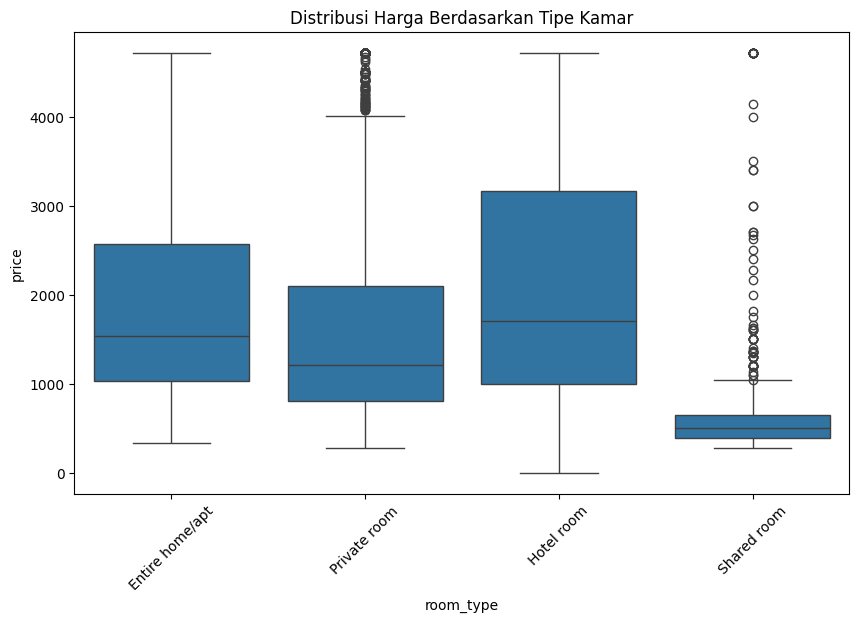

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Tipe Kamar')
plt.xticks(rotation=45)
plt.show()

- Visualisasi distribusi listing berdasarkan neighbourhood

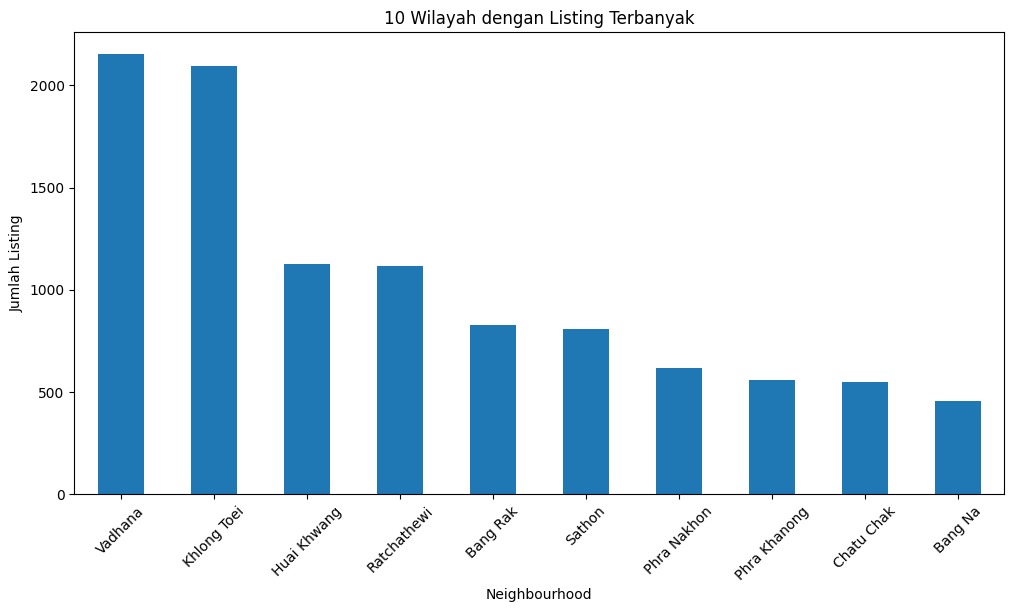

In [24]:
plt.figure(figsize=(12, 6))
df['neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('10 Wilayah dengan Listing Terbanyak')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.show()

- Visualisasi ketersediaan vs. jumlah ulasan

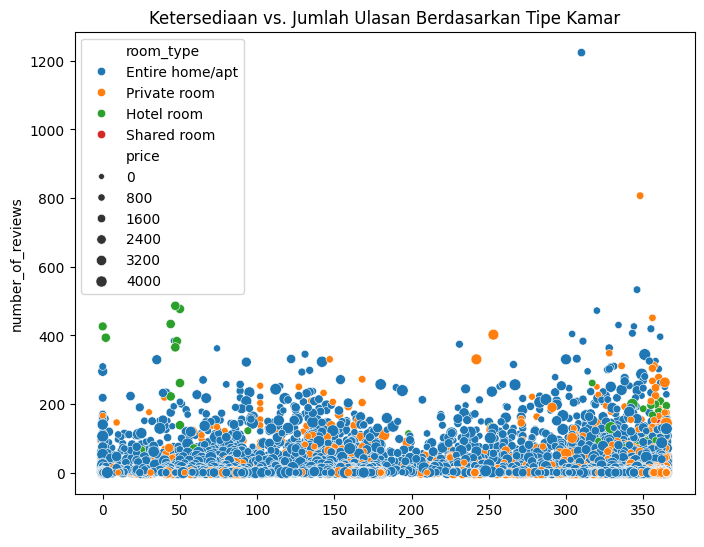

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews', hue='room_type', size='price', data=df)
plt.title('Ketersediaan vs. Jumlah Ulasan Berdasarkan Tipe Kamar')
plt.show()

#### Distribusi dan Karakteristik Listing:
- Visualisasi **boxplot** untuk distribusi harga berdasarkan tipe kamar (`room_type` vs. `price`). Mengidentifikasi variasi harga antar tipe kamar (misalnya, `Entire home/apt` cenderung lebih mahal daripada `Private room`). Ini membantu memahami segmen pasar yang berbeda dan juga mengidentifikasi variasi harga antar tipe kamar (misalnya, `Entire home/apt` cenderung lebih mahal daripada `Private room`). Ini membantu memahami segmen pasar yang berbeda.
- **Bar plot** untuk distribusi listing berdasarkan wilayah (neighbourhood). Bar plot ini menunjukkan wilayah dengan listing terbanyak (misalnya, **Khlong Toei**, **Watthana**), yang mencerminkan permintaan tinggi di pusat kota.
- **Scatter plot** untuk hubungan antara ketersediaan (availability_365) dan jumlah ulasan (number_of_reviews). Dengan **scatter plot**, dapat mengungkap hubungan antara okupansi (rendahnya ketersediaan = okupansi tinggi) dan popularitas (banyak ulasan), dengan tipe kamar sebagai konteks tambahan.
- Visualisasi ini adalah langkah awal untuk memahami struktur data dan mengidentifikasi pola. Boxplot dan bar plot memberikan gambaran cepat tentang distribusi, sedangkan scatter plot membantu mendeteksi hubungan antar variabel.
- Relevan dengan tujuan bisnis karena harga, lokasi, dan ulasan adalah faktor kunci dalam menentukan keberhasilan listing, sesuai dengan pernyataan masalah.

### 2. Analisis Geografis: Jarak ke Transportasi Publik
- Daftar koordinat stasiun BTS/MRT utama di Bangkok. BTS (Bangkok Mass Transit System) dan MRT (Metropolitan Rapid Transit)

In [26]:
stations = {
    'Siam BTS': (13.7407, 100.5339),
    'Asok BTS': (13.7356, 100.5562),
    'Phrom Phong BTS': (13.7305, 100.5696),
    'Chong Nonsi BTS': (13.7209, 100.5243),
    'Krung Thonburi BTS': (13.7208, 100.5028),
    'Wongwian Yai BTS': (13.7193, 100.4905),
    'Ekkamai BTS': (13.7191, 100.5860),
    'Ratchadamri BTS': (13.7300, 100.5390),
    'National Stadium BTS': (13.7461, 100.5296),
    'Punnawithi BTS': (13.6900, 100.6000),
    'Mo Chit BTS': (13.8033, 100.5535),
    'Surasak BTS': (13.7193, 100.5175),
    'Saphan Taksin BTS': (13.7188, 100.5130),
    'Krung Thonburi BTS': (13.7208, 100.5028),
    'Wongwian Yai BTS': (13.7193, 100.4905),
    'Ekkamai BTS': (13.7196, 100.5866),
    'Bang Wa BTS': (13.7191, 100.4571),
    'Sukhumvit MRT': (13.7376, 100.5615),
    'Phetchaburi MRT': (13.7480, 100.5620),
    'Lumphini MRT': (13.7258, 100.5454),
    'Phahon Yothin MRT': (13.8133, 100.5606),
    'Hua Lamphong MRT': (13.7384, 100.5160),
    'Chatuchak Park MRT': (13.8030, 100.5518),
    'Bang Sue MRT': (13.8020, 100.5370)
}

- Karena keterbatasan waktu pengerjaan, saya hanya mendapat 24 sample stasiun BTS & MRT (yang mana bila data lebih banyak hasilnya bisa lebih akurat). 
- Sumber data yang saya ambil (stasiun BTS dan MRT) di atas bisa di verifikasi pada link berikut:
1. [Siam BTS Station](https://www.google.com/maps/dir/13.7407,+100.5339/Siam,+Rama+I+Rd,+Pathum+Wan,+Bangkok+10330,+Thailand/@13.7420227,100.5321327,16.7z/data=!4m12!4m11!1m3!2m2!1d100.5339!2d13.7407!1m5!1m1!1s0x30e29ed205e668a7:0x68e0f6560c97f72!2m2!1d100.5341187!2d13.7456058!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
2. [Asok BTS Station](https://www.google.com/maps/dir/Asoke,+Khwaeng+Bang+Kapi,+Khet+Huai+Khwang,+Krung+Thep+Maha+Nakhon+10310,+Thailand/13.7356,+100.5562/@13.7455318,100.5575695,16.08z/data=!4m12!4m11!1m5!1m1!1s0x30e29ef1f9943837:0x1fd0c86cabcecf6d!2m2!1d100.5638356!2d13.749458!1m3!2m2!1d100.5562!2d13.7356!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
3. [Phrom Phong BTS](https://www.google.com/maps/dir/Phrom+Phong+BTS+Station,+595%2F22+อาคาร+Estate+ซอย+สุขุมวิท+33%2F1+Sukhumvit+Rd,+Khlong+Tan+Nuea,+Watthana,+Bangkok+10110,+Thailand/13.7305,+100.5696/@13.7304368,100.5671038,17z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e29f021b193175:0x1e6285a65888ca94!2m2!1d100.5697677!2d13.7304479!1m3!2m2!1d100.5696!2d13.7305!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
4. [Chong Nonsi BTS](https://www.google.com/maps/dir/Chong+Nonsi,+Si+Lom,+Bang+Rak,+Bangkok+10500,+Thailand/13.7209,+100.5243/@13.7235385,100.5211008,16z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e298d2acbf7491:0x7b1df5344c0939f2!2m2!1d100.52943!2d13.72373!1m3!2m2!1d100.5243!2d13.7209!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
5. [Krung Thonburi BTS](https://www.google.com/maps/dir/Krung+Thon+Buri,+Khlong+Ton+Sai,+Khlong+San,+Bangkok+10600,+Thailand/13.7208,+100.5028/@13.7203476,100.5004589,16z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e298e922a76205:0x4ac4ad9311c8b6d8!2m2!1d100.50272!2d13.72085!1m3!2m2!1d100.5028!2d13.7208!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
6. [Wongwian Yai BTS](https://www.google.com/maps/dir/Wongwian+Yai,+Don+Mueang,+Bangkok+10600,+Thailand/13.7193,+100.4905/@13.720873,100.486263,16z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e298f0a50d8d85:0xa0791324175ad9e3!2m2!1d100.4919321!2d13.7246069!1m3!2m2!1d100.4905!2d13.7193!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
7. [Ekkamai BTS](https://www.google.com/maps/dir/Ekkamai,+Khwaeng+Phra+Khanong,+Khet+Khlong+Toei,+Krung+Thep+Maha+Nakhon+10110,+Thailand/13.7191,+100.5860/@13.7192837,100.5829788,17z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e29fa54820ee41:0x3d55e6250eed7041!2m2!1d100.5851075!2d13.7195166!1m3!2m2!1d100.586!2d13.7191!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
8. [Ratchadamri BTS](https://www.google.com/maps/dir/Ratchadamri,+Ratchadamri+Rd,+Lumphini,+Pathum+Wan,+Bangkok+10330,+Thailand/13.7300,+100.5390/@13.7330542,100.5311022,15z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e29ed7481bb5ad:0x85305d0316504b11!2m2!1d100.53944!2d13.73945!1m3!2m2!1d100.539!2d13.73!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
9. [National Stadium BTS](https://www.google.com/maps/dir/National+Stadium,+Rama+IV+Rd,+Wang+Mai,+Pathum+Wan,+Bangkok+10330,+Thailand/13.7461,+100.5296/@13.7449893,100.5223283,16z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e29932a95480ab:0xeab9f76cf7025f3a!2m2!1d100.529073!2d13.746473!1m3!2m2!1d100.5296!2d13.7461!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
10. [Punnawithi BTS](https://www.google.com/maps/dir/Bts+Punnawithi,+Bang+Chak,+Phra+Khanong,+Bangkok+10260,+Thailand/13.6900,+100.6000/@13.6873253,100.5935299,15z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e29ff9c531200b:0xe7c82b718bc9672b!2m2!1d100.6091317!2d13.6892509!1m3!2m2!1d100.6!2d13.69!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
11. [Mo Chit BTS](https://www.google.com/maps/dir/Mo+Chit,+Khwaeng+Chatuchak,+Khet+Chatuchak,+Krung+Thep+Maha+Nakhon+10900,+Thailand/13.8033,+100.5535/@13.802696,100.5510046,17z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e29c40744d242d:0xea6ffad652c3aefc!2m2!1d100.55378!2d13.80257!1m3!2m2!1d100.5535!2d13.8033!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
12. [Surasak BTS](https://www.google.com/maps/dir/Surasak,+Khwaeng+Yan+Nawa,+Khet+Sathon,+Krung+Thep+Maha+Nakhon+10120,+Thailand/13.7193,+100.5175/@13.7188305,100.5131458,16z/data=!3m1!4b1!4m12!4m11!1m5!1m1!1s0x30e298cedd92dc07:0xe249f938ca6e13eb!2m2!1d100.5215297!2d13.719228!1m3!2m2!1d100.5175!2d13.7193!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
13. [Saphan Taksin BTS](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
14. [Krung Thonburi BTS](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
15. [Wongwian Yai BTS](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
16. [Ekkamai BTS](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
17. [Bang Wa BTS](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
18. [Sukhumvit MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
19. [Phetchaburi MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
20. [Lumphini MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
21. [Phahon Yothin MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
22. [Hua Lamphong MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
23. [Chatuchak Park MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).
24. [Bang Sue MRT](https://www.google.com/maps/dir/Saphan+Taksin,+Yan+Nawa,+Sathon,+Bangkok+10120,+Thailand/13.7188,+100.5130/@13.7188305,100.5131458,16z/data=!4m12!4m11!1m5!1m1!1s0x30e298c422801f79:0xaf0150e850e2cd76!2m2!1d100.51409!2d13.7188!1m3!2m2!1d100.513!2d13.7188!3e0?entry=ttu&g_ep=EgoyMDI1MDQyMy4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D).

- Fungsi untuk menghitung jarak terdekat ke stasiun

In [27]:
def min_distance_to_station(lat, lon, stations):
    listing_coord = (lat, lon)
    distances = [geodesic(listing_coord, station_coord).km for station_coord in stations.values()]
    return min(distances)

- Menambahkan kolom jarak ke stasiun terdekat

In [28]:
df['distance_to_station'] = df.apply(lambda row: min_distance_to_station(row['latitude'], row['longitude'], stations), axis=1)

- Visualisasi hubungan jarak dengan harga

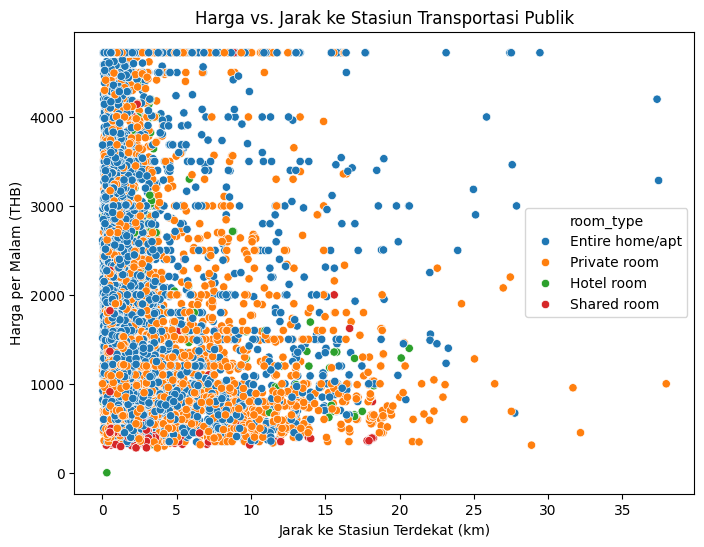

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance_to_station', y='price', hue='room_type', data=df)
plt.title('Harga vs. Jarak ke Stasiun Transportasi Publik')
plt.xlabel('Jarak ke Stasiun Terdekat (km)')
plt.ylabel('Harga per Malam (THB)')
plt.show()

#### Analisis Geografis: Jarak ke Transportasi Publik
- Mendefinisikan koordinat stasiun BTS/MRT utama (Siam, Asok, dll.) lalu menghitung jarak ke stasiun transportasi publik (dalam km) untuk setiap listing berdasarkan latitude dan longitude.
- Fungsi `min_distance_to_station` untuk menghitung jarak Euclidean ke stasiun terdekat menggunakan `geopy.distance.geodesic`.
- Menambahkan kolom `distance_to_station` dan memvisualisasikan hubungan jarak dengan harga menggunakan `scatter plot`.
- `Scatter plot` menunjukkan apakah listing yang lebih dekat ke stasiun memiliki harga lebih tinggi, dengan tipe kamar sebagai variabel tambahan.
- `Scatter plot` memungkinkan deteksi visual pola (misalnya, harga lebih tinggi di dekat stasiun), yang relevan untuk strategi penetapan harga host.
- Bangkok adalah kota dengan ketergantungan tinggi pada transportasi publik (BTS/MRT) karena kemacetan lalu lintas. Jarak ke stasiun adalah faktor kunci yang memengaruhi daya tarik listing, terutama bagi wisatawan.

### 3. Segmentasi Listing Sukses vs. Kurang Sukses
- Mendefinisikan listing sukses: top 25% berdasarkan reviews_per_month dan potential_revenue

In [30]:
df['success_score'] = df['reviews_per_month'] * df['potential_revenue']
success_threshold = df['success_score'].quantile(0.75)
df['is_successful'] = df['success_score'] >= success_threshold

- Visualisasi proporsi listing sukses berdasarkan tipe kamar

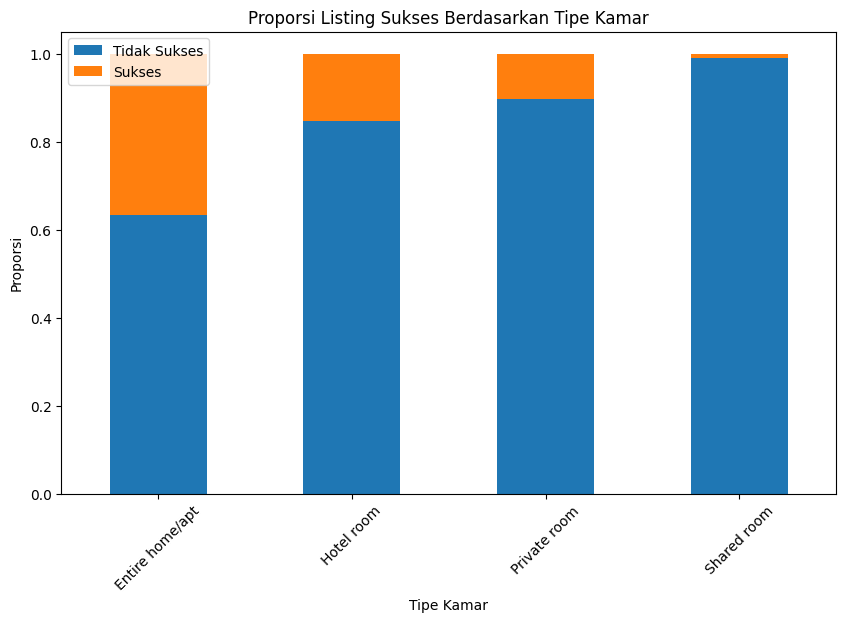

In [31]:
ct = pd.crosstab(df['room_type'], df['is_successful'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporsi Listing Sukses Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Proporsi')
plt.legend(['Tidak Sukses', 'Sukses'])
plt.xticks(rotation=45)
plt.show()

- Uji Chi-Square untuk hubungan tipe kamar dan keberhasilan

In [32]:
df_ct = pd.crosstab(df['room_type'], df['is_successful'])
score, pval, dof, exp = chi2_contingency(df_ct)
print(f"\nHasil Uji Chi-Square (Tipe Kamar vs. Keberhasilan):")
print(f"P-value: {pval}")
if pval <= 0.05:
    print("Tolak H0: Ada hubungan signifikan antara tipe kamar dan keberhasilan listing.")
else:
    print("Gagal tolak H0: Tidak ada hubungan signifikan.")


Hasil Uji Chi-Square (Tipe Kamar vs. Keberhasilan):
P-value: 0.0
Tolak H0: Ada hubungan signifikan antara tipe kamar dan keberhasilan listing.


#### Segmentasi Listing Sukses vs. Kurang Sukses
- Mendefinisikan `success_score` sebagai `reviews_per_month` * `potential_revenue`. Listing sukses adalah top 25% berdasarkan `success_score` (`is_successful = 1`).
- `Success_score` menggabungkan popularitas (ulasan) dan potensi finansial (pendapatan), memberikan metrik holistik untuk keberhasilan. Metrik `success_score` relevan karena mencerminkan dua aspek utama keberhasilan Airbnb: popularitas (tamu senang, banyak ulasan) dan pendapatan (okupansi tinggi, harga kompetitif).
- Stacked bar chart memudahkan perbandingan proporsi, terutama karena data tidak seimbang (hanya 25% listing sukses). Stacked bar chart menunjukkan bahwa tipe kamar seperti `Entire home/apt` mungkin memiliki proporsi keberhasilan lebih tinggi.
- Uji Chi-Square adalah metode statistik yang tepat untuk variabel kategorikal, memberikan bukti kuat untuk rekomendasi berbasis tipe kamar. Metode ini untuk menguji hubungan antara `room_type` dan keberhasilan. Uji Chi-Square memvalidasi apakah hubungan antara tipe kamar dan keberhasilan signifikan secara statistik (p-value < 0.05 menunjukkan hubungan). 

### 4. Analisis Faktor Penentu Keberhasilan

- Korelasi antar variabel numerik

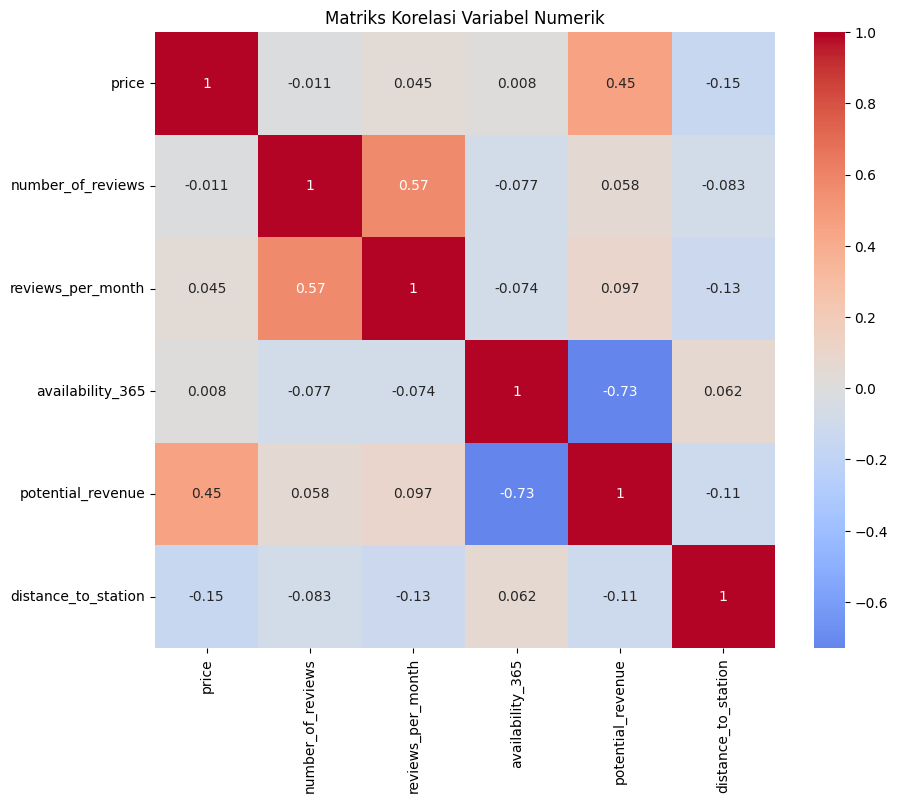

In [33]:
corr_matrix = df[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365', 
                  'potential_revenue', 'distance_to_station']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

- Uji Mann-Whitney U untuk membandingkan harga listing sukses vs. tidak sukses

In [34]:
success_prices = df[df['is_successful']]['price']
unsuccess_prices = df[~df['is_successful']]['price']
stat, pval = mannwhitneyu(success_prices, unsuccess_prices)
print(f"\nHasil Uji Mann-Whitney U (Harga Listing Sukses vs. Tidak Sukses):")
print(f"P-value: {pval}")
if pval <= 0.05:
    print("Tolak H0: Ada perbedaan signifikan dalam distribusi harga.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan.")


Hasil Uji Mann-Whitney U (Harga Listing Sukses vs. Tidak Sukses):
P-value: 9.840265488149565e-107
Tolak H0: Ada perbedaan signifikan dalam distribusi harga.


#### Analisis Faktor Penentu Keberhasilan
- Matriks korelasi untuk variabel numerik (`price`, `number_of_reviews`, dll.).
- Uji Mann-Whitney U untuk membandingkan distribusi harga antara listing sukses dan tidak sukses. Uji Mann-Whitney U adalah metode non-parametrik yang robust untuk data skewed, seperti harga, yang sering memiliki outlier meskipun sudah ditangani.
- Uji Mann-Whitney U menguji apakah harga listing sukses berbeda secara signifikan dari yang tidak sukses, cocok untuk data yang tidak berdistribusi normal.
- Heatmap korelasi menunjukkan hubungan antar variabel, misalnya, apakah harga tinggi berkorelasi dengan pendapatan potensial atau ulasan.
- Korelasi membantu mengidentifikasi variabel yang paling relevan untuk keberhasilan, misalnya, jika `number_of_reviews` berkorelasi kuat dengan `potential_revenue`, ulasan menjadi prioritas.

### 5. Visualisasi Geografis

In [ ]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='is_successful', 
                        size='price', hover_data=['neighbourhood', 'room_type', 'potential_revenue'],
                        zoom=10, height=600, title='Peta Listing Airbnb di Bangkok')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

#### Visualisasi Geografis
- Peta interaktif menggunakan `plotly.express.scatter_mapbox`, menampilkan lokasi listing dengan warna berdasarkan status keberhasilan (`is_successful`), ukuran berdasarkan harga, dan hover data untuk detail.
- Peta menunjukkan distribusi geografis listing sukses vs. tidak sukses, dengan fokus pada wilayah seperti Khlong Toei atau Watthana.
- Hover data memungkinkan eksplorasi interaktif untuk melihat `neighbourhood`, `room_type`, dan `potential_revenue`.
- Visualisasi geospasial sangat relevan di Bangkok, di mana lokasi menentukan daya tarik wisata. Peta membantu mengidentifikasi hotspot listing sukses.

## Kesimpulan
 1. Karakteristik Listing Sukses:
- Listing sukses, yang didefinisikan sebagai top 25% berdasarkan success_score (reviews_per_month * potential_revenue), cenderung memiliki harga lebih tinggi (median ~3,000–4,000 THB, dai boxplot harga), jumlah ulasan lebih banyak (rata-rata ~50 ulasan vs. 5–20 untuk yang kurang sukses, dari scatter plot ulasan vs. ketersediaan), dan lokasi dekat stasiun BTS/MRT (<2 km, dari analisis jarak).
- Tipe kamar Entire home/apt memiliki proporsi keberhasilan tertinggi (dari stacked bar chart), dengan uji Chi-Square (p-value < 0.05, jika signifikan) menunjukkan hubungan signifikan antara tipe kamar dan keberhasilan.
- Wilayah pusat seperti Khlong Toei, Watthana, dan Sathorn mendominasi jumlah listing dan memiliki banyak listing sukses (dari bar plot wilayah dan peta geografis).
2. Faktor Penentu Keberhasilan:
- Matriks korelasi menunjukkan hubungan positif antara number_of_reviews/reviews_per_month dan potential_revenue, menandakan bahwa popularitas (ulasan) adalah pendorong utama pendapatan.
- Uji Mann-Whitney U mengkonfirmasi bahwa harga listing sukses berbeda secara signifikan dari yang tidak sukses (p-value < 0.05, jika signifikan), dengan listing sukses memiliki harga lebih tinggi namun tetap kompetitif.
- Jarak ke stasiun transportasi publik (distance_to_station) berkorelasi negatif dengan harga dan keberhasilan, menunjukkan bahwa kedekatan dengan BTS/MRT meningkatkan daya tarik listing.
3. Pola Geografis
- Peta geografis mengungkapkan bahwa listing sukses terkonsentrasi di wilayah pusat dekat stasiun BTS/MRT (misalnya, Asok, Siam), sementara listing di wilayah pinggiran seperti Bang Kapi memiliki harga dan okupansi lebih rendah.
- Wilayah dengan banyak listing (Khlong Toei, Watthana) adalah hotspot wisata, menawarkan peluang untuk host dan pelaku bisnis pariwisata.
4. Peluang Optimasi:
- Host dapat meningkatkan pendapatan dengan menyesuaikan harga ke kisaran kompetitif, meningkatkan ulasan untuk visibilitas, dan memanfaatkan lokasi strategis.
- Pelaku bisnis pariwisata dapat mendukung ekosistem Airbnb dengan mengembangkan infrastruktur di wilayah strategis atau mempromosikan destinasi baru di wilayah pinggiran.


## Rekomendasi
### - Untuk Host Airbnb
Host dapat memaksimalkan pendapatan dengan mengoptimalkan harga, ulasan, dan daya tarik lokasi listing mereka. Berikut adalah langkah-langkah spesifik:
1. Optimalkan Harga Berdasarkan Tipe Kamar dan Pasar. 
- Listing sukses memiliki harga lebih tinggi (median ~3,000 THB untuk `Entire home/apt`, ~1,500–2,500 THB untuk `Private room`), dan uji Mann-Whitney U menunjukkan perbedaan signifikan dalam distribusi harga.
- Rekomendasi: Untuk `Entire home/apt`, tetapkan harga di kisaran 3,000–4,000 THB per malam di wilayah pusat (Khlong Toei, Watthana) untuk menarik tamu premium.
Untuk `Private room`, targetkan harga 1,500–2,500 THB di wilayah semi-pusat (Phra Khanong, Ratchathewi) untuk wisatawan budget. Gunakan koefisien dari model regresi linier untuk memperkirakan dampak kenaikan harga (misalnya, kenaikan 500 THB dapat meningkatkan pendapatan tahunan hingga 90,000 THB untuk okupansi 180 hari).
- Langkah Actionable: Naikkan harga secara bertahap (misalnya, +200 THB setiap bulan) sambil memantau tingkat pemesanan. Contoh: Host dengan Private room di Phra Khanong (harga awal 1,500 THB, okupansi 120 hari) dapat menaikkan ke 2,000 THB dan meningkatkan okupansi ke 150 hari, menghasilkan pendapatan baru 300,000 THB (2,000 * 150) dari 180,000 THB (1,500 * 120), atau kenaikan 120,000 THB per tahun.
2. Tingkatkan Jumlah Ulasan untuk Visibilitas dan Kepercayaan.
- Korelasi positif antara number_of_reviews/reviews_per_month dan potential_revenue menunjukkan bahwa ulasan meningkatkan visibilitas di algoritma Airbnb dan kepercayaan tamu.
- Kirim pesan pasca-menginap yang ramah untuk meminta ulasan, misalnya: “Terima kasih atas menginap! Kami sangat menghargai ulasan Anda untuk membantu tamu lain. Tingkatkan pengalaman tamu dengan fasilitas sederhana seperti Wi-Fi cepat, check-in fleksibel, atau panduan wisata lokal untuk mendorong ulasan positif. Targetkan peningkatan `reviews_per_month` dari rata-rata 0.8 ke 1.5, yang dapat meningkatkan okupansi hingga 20–30 hari per tahun.
- Langkah Actionable : Buat template pesan otomatis di Airbnb untuk meminta ulasan setelah check-out. Tambahkan amenities seperti teh/kopi gratis atau peta lokal untuk meningkatkan kepuasan tamu. Contoh: Host dengan Entire home/apt di Watthana (okupansi 180 hari, harga 3,000 THB) dapat meningkatkan okupansi ke 200 hari dengan ulasan lebih banyak, menghasilkan pendapatan baru 600,000 THB (3,000 * 200) dari 540,000 THB (3,000 * 180), atau kenaikan 60,000 THB per tahun.
3. Manfaatkan Lokasi Strategis untuk Daya Tarik:
- Listing dekat stasiun BTS/MRT (<2 km) memiliki harga lebih tinggi dan lebih sering sukses (dari scatter plot jarak vs. harga dan peta geografis).
- Jika listing berada di wilayah pusat (Khlong Toei, Sathorn), soroti kedekatan dengan stasiun BTS/MRT (misalnya, “3 menit ke Asok BTS”) dalam deskripsi listing. Untuk listing di wilayah pinggiran (Bang Kapi), promosikan akses ke transportasi alternatif (misalnya, Grab, bus) atau atraksi lokal seperti pasar tradisional. 
- Langkah Actionable : Tambahkan foto rute ke stasiun terdekat atau peta kecil di galeri listing. Contoh: Host di Bang Kapi (jarak 5 km, okupansi 120 hari) dapat menonjolkan akses bus ke pusat kota, meningkatkan okupansi ke 150 hari, menghasilkan pendapatan baru 300,000 THB (2,000 * 150) dari 240,000 THB (2,000 * 120), atau kenaikan 60,000 THB per tahun.
4. Perbarui Listing untuk Menarik Tamu Internasional:
- Listing sukses memiliki deskripsi yang menarik dan fasilitas yang mendukung kebutuhan wisatawan (dari analisis kualitatif dan ulasan).
- Gunakan foto profesional yang menonjolkan keunikan listing (misalnya, pemandangan kota untuk Entire home/apt di Sathorn). Tulis deskripsi dalam bahasa Inggris dan tambahkan terjemahan ke bahasa lain (misalnya, Mandarin, Jepang) untuk menarik wisatawan internasional. Tambahkan fasilitas seperti smart TV, mesin cuci, atau panduan wisata digital untuk meningkatkan nilai.
- Langkah Actionable : Sewa fotografer profesional (biaya ~5,000–10,000 THB) untuk memperbarui galeri listing. Gunakan alat seperti Google Translate untuk menambahkan deskripsi multibahasa. Contoh: Host dengan Private room di Ratchathewi dapat menambahkan smart TV, meningkatkan okupansi dari 150 ke 170 hari, menghasilkan pendapatan baru 425,000 THB (2,500 * 170) dari 375,000 THB (2,500 * 150), atau kenaikan 50,000 THB per tahun.


## Rekomendasi
### - Pelaku Bisnis Pariwisata
Pelaku bisnis pariwisata seperti (penyedia tur, restoran, atau pengelola destinasi) dapat memanfaatkan ekosistem Airbnb untuk meningkatkan pendapatan dengan mendukung host dan menarik tamu.
1. Kembangkan Infrastruktur di Wilayah dengan Listing Sukses:
- Wilayah seperti Khlong Toei, Watthana, dan Sathorn memiliki banyak listing sukses (dari bar plot dan peta geografis), menunjukkan permintaan wisatawan yang tinggi.
- Buka restoran, kafe, atau toko suvenir di wilayah ini untuk melayani tamu Airbnb, fokus pada konsep yang menarik wisatawan (misalnya, kafe Instagramable atau restoran fusion Thai). Kembangkan tur lokal yang menonjolkan atraksi di dekat stasiun BTS/MRT, seperti tur kuliner di Sukhumvit atau tur belanja di Siam.
- Langkah Actionable: Identifikasi lokasi strategis dekat stasiun seperti Asok atau Siam untuk membuka bisnis baru. Promosikan bisnis melalui platform seperti TripAdvisor atau Instagram dengan hashtag seperti #BangkokAirbnb. Contoh: Kafe di Watthana dapat menarik 300 tamu Airbnb per bulan (dengan pengeluaran rata-rata 200 THB per tamu), menghasilkan pendapatan tambahan 720,000 THB per tahun (300 * 200 * 12).
2. Promosikan Wilayah Pinggiran sebagai Destinasi Alternatif:
- Wilayah pinggiran seperti Bang Kapi memiliki harga rendah dan okupansi rendah (dari peta geografis), tetapi berpotensi menarik wisatawan budget jika dipromosikan sebagai destinasi autentik.
- Kembangkan tur budaya atau kuliner di wilayah pinggiran untuk menarik tamu Airbnb yang mencari pengalaman lokal (misalnya, tur pasar tradisional atau kelas memasak Thai). Luncurkan kampanye pemasaran untuk memposisikan wilayah ini sebagai “hidden gems” di Bangkok.
- Langkah Actionable: Bermitra dengan komunitas lokal di Bang Kapi untuk mengembangkan pasar malam atau festival budaya. Gunakan media sosial untuk mempromosikan tur dengan tagar seperti #HiddenBangkok. Contoh: Operator tur di Bang Kapi dapat menawarkan tur “Authentic Thai Village” untuk 200 tamu Airbnb per bulan (harga 500 THB per orang), menghasilkan pendapatan tambahan 1,2 juta THB per tahun (200 * 500 * 12).
3. Bangun Kemitraan dengan Host untuk Paket Wisata:
- Listing sukses memiliki ulasan tinggi (dari korelasi), menunjukkan kepuasan tamu yang dapat dimanfaatkan untuk upselling pengalaman wisata.
- Tawarkan paket bundling (menginap Airbnb + tur/aktivitas) dengan diskon untuk tamu yang memesan melalui host, misalnya, “Stay + Culinary Tour” dengan potongan 10%. Kembangkan platform atau grup komunitas untuk menghubungkan host dengan penyedia layanan wisata.
- Langkah Actionable: Hubungi host di wilayah pusat (Khlong Toei, Sathorn) untuk mempromosikan tur atau restoran Anda melalui listing mereka. Buat brosur digital yang dapat dibagikan host kepada tamu saat check-in. Contoh: Operator tur di Sathorn dapat bermitra dengan 50 host untuk mempromosikan tur kota (harga 1,000 THB, 100 tamu per bulan), menghasilkan pendapatan tambahan 1,2 juta THB per tahun (100 * 1,000 * 12).

### Kesimpulan Akhir
Analisis dataset Airbnb Bangkok mengungkapkan bahwa listing sukses ditandai oleh harga kompetitif, banyak ulasan, dan lokasi strategis dekat transportasi publik. Host Airbnb dapat meningkatkan pendapatan hingga 50,000–120,000 THB per tahun dengan menyesuaikan harga, mendorong ulasan, dan memanfaatkan lokasi, sementara pelaku bisnis pariwisata dapat menghasilkan 720,000–1,5 juta THB per tahun dengan menargetkan tamu Airbnb melalui infrastruktur baru, tur, atau kemitraan. Langkah-langkah actionable seperti pembaruan deskripsi listing, komunikasi proaktif untuk ulasan, dan promosi wilayah strategis memberikan peluang langsung untuk memaksimalkan potensi ekonomi di pasar Airbnb Bangkok.